<a href="https://colab.research.google.com/github/HJJJJX/GEO_Practice/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="blue"> Final Project</font>


*   Authors: Haojun Xia, Joseph Butarbutar
*   Instructors: Sergey Fomel, Zoltan Sylvester
Zoltan Sylvester










*   <font color="blue"> Import all the libraries </font>:



In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder # for preprocessing data
import pandas as pd  # for data frame
import numpy as np   # nump array
import matplotlib.pyplot as plt # plotting
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor      # model-based feature importance
from sklearn.feature_selection import mutual_info_regression # mutual information
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # data splitting , hyper parameter tuning and cross validation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error #metrics
import seaborn as sns ####data visulization

from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

from sklearn.model_selection import GridSearchCV



*   <font color="blue"> Import the data and distribute the top five rows</font>



In [3]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = "https://raw.githubusercontent.com/UT-GEOML/Code-Catalysts/main/Project/Well_Information.csv?token=GHSAT0AAAAAACM6VQMNICL5TUFQXJCXGO4QZRQLYHA"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

In [4]:
df.head()

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,5,19.93,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
343,351,75.84,Everglades,12900,NaN,8355.0,Orange Crush,1,10011111,Edge,...,137,-1.0,-1.0,4,0.479940,376,2740.898161,258.6,2287.936791,615.9
344,352,81.43,Everglades,13000,NaN,8270.0,Orange Crush,1,11001111,Edge,...,238,-7.8,1.0,5,0.477837,467,2667.717992,267.3,2357.296098,589.9
345,354,29.18,Mount Rainier,7700,NaN,10300.0,Coke,1,11111000,Edge,...,12,0.0,0.0,1,0.530874,315,2969.985594,230.1,1821.549742,314.5
346,355,80.59,Everglades,12900,NaN,10410.0,Coke,0,11000000,Edge,...,12,0.0,0.0,1,0.478153,541,2761.233882,1035.5,2149.114144,779.2
347,356,30.42,Mount Rainier,7700,NaN,10355.0,Coke,1,11111001,Edge,...,11,0.0,0.0,1,0.530376,355,2966.579531,158.1,1818.192820,360.6


<font color="blue"> Feature Engineering</font>

*   <font color="blue"> Showing the completness of the data</font>:



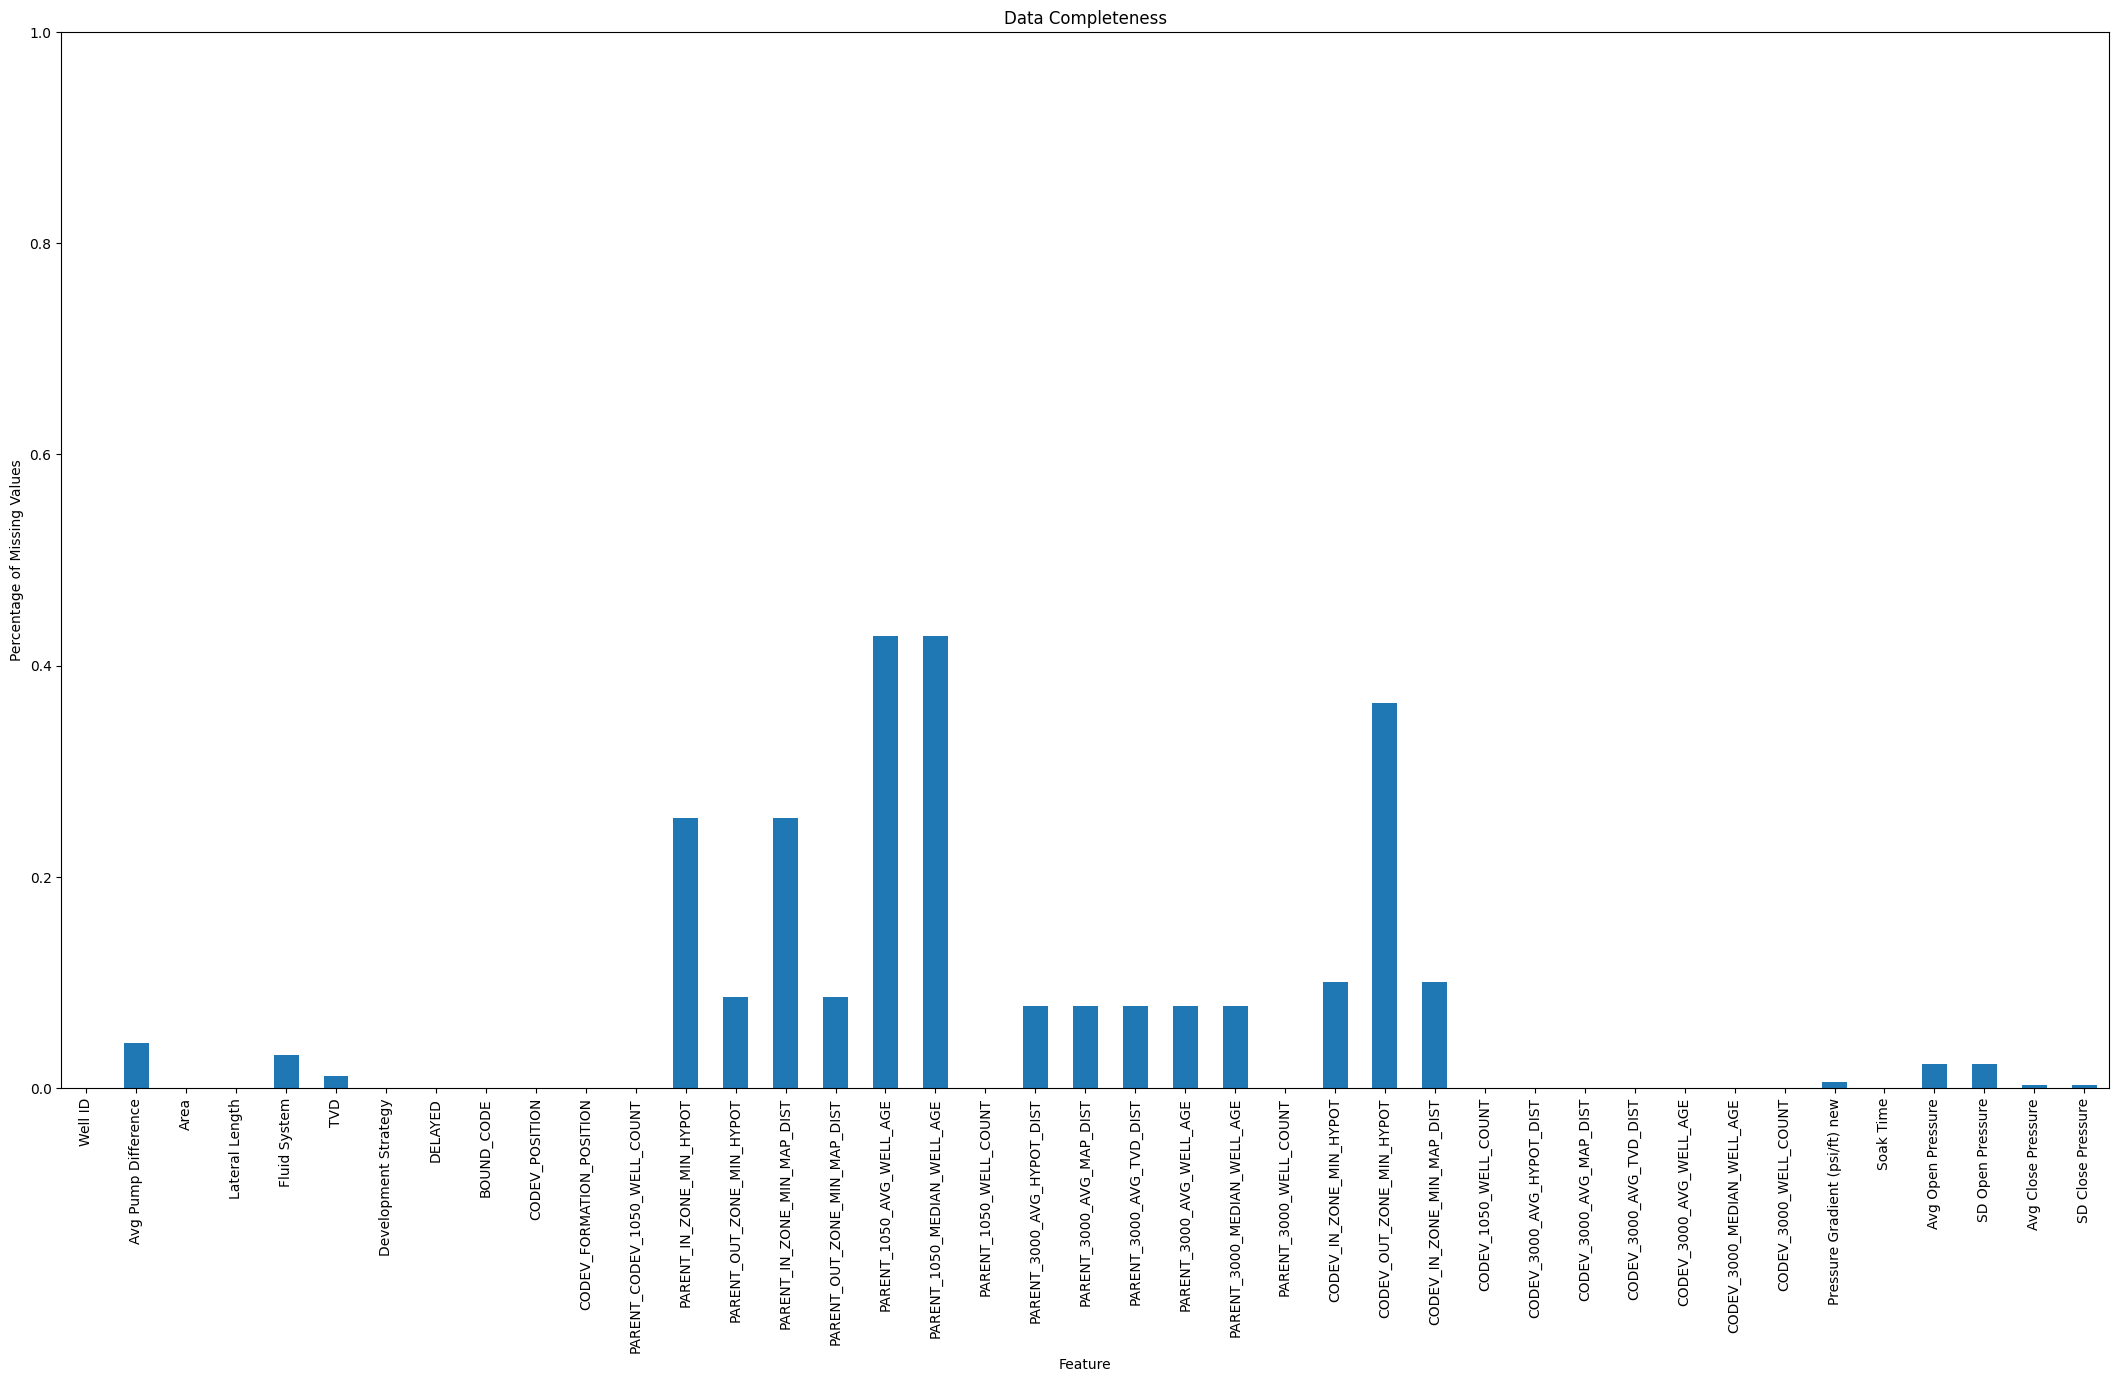

In [6]:
plt.plot()
(df.isnull().sum()/len(df)).plot(kind = 'bar')          # calculate DataFrame with percentage missing by feature
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Values'); plt.title('Data Completeness'); plt.ylim([0.0,1.0])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()



*   <font color="blue"> Define the prediction and response features:</font>



In [7]:
### name of response feature
response_feature = "Avg Pump Difference"
######slect the data with unkown response feature
df_pred = df[df[response_feature].isnull()]
####select the data with known response feature
df.dropna(subset=[response_feature],inplace=True)



*   <font color="blue"> Selecting the features which missing over 20% data</font>
*   <font color="blue"> Dropping the features which missing over 20% data</font>



In [8]:
#####feature list with high missing data rate####
missing_feature_list = ["PARENT_IN_ZONE_MIN_MAP_DIST","PARENT_IN_ZONE_MIN_HYPOT","PARENT_1050_AVG_WELL_AGE",\
                     "PARENT_1050_MEDIAN_WELL_AGE","CODEV_OUT_ZONE_MIN_HYPOT"]
###drop the feature for df
df = df.drop(columns=missing_feature_list)
###drop the feature for df_pred
df_pred = df_pred.drop(columns=missing_feature_list)

In [9]:
#####delete the features with well id & respoinse features for df
X = df.iloc[:,2:]
 #######delete delete the features with well id & respoinse features for df_pred
X_pred = df_pred.iloc[:,2:]
#####response feature data
Y = df.iloc[:,1]



*   <font color="blue"> For the rest of the features, if they have missing value, replace the missing value with the median value of this feature </font>:



In [10]:
num_fea = list(X.select_dtypes('number'))
cat_fea = list(X.select_dtypes('object'))

for column in num_fea:
    column_median = X[column].median()
    X[column].fillna(column_median,inplace=True)
    column_median_pred = X_pred[column].median()
    X_pred[column].fillna(column_median_pred,inplace=True)

<font color="blue"> Label Encoders</font>


*   <font color="blue"> There are both numerical and categorical features in our data</font>
*   <font color="blue"> Modifying the categorical data into the numerical data to fit the model</font>



In [11]:
label_encoders = {}
for column in cat_fea:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
    X_pred[column] = label_encoders[column].fit_transform(X_pred[column])



*   <font color="blue"> Standardlize all the data:</font>



In [12]:
scaler = StandardScaler()
X[num_fea] = scaler.fit_transform(X[num_fea])
X_pred[num_fea] = scaler.fit_transform(X_pred[num_fea])

In [13]:
X_num = X[num_fea]
X_cat = X[cat_fea]

X_pred_num = X_pred[num_fea]
X_pred_cat = X_pred[cat_fea]

X_combined = pd.concat([X[num_fea], X[cat_fea]], axis=1)

X_combined_pred = pd.concat([X_pred[num_fea], X_pred[cat_fea]], axis=1)

<font color="blue"> Principal Component Analysis (PCA)</font>

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=31)
pca_result = pca.fit_transform(X_combined)



*   <font color="blue"> Ranking the features based on the importance:</font>



In [15]:
# Get the absolute values of principal component loadings
loadings_abs = abs(pca.components_)

# Create a DataFrame to display the importance of each feature
feature_importance = pd.DataFrame(loadings_abs.T, columns=[f'PC{i}' for i in range(1, 32)], index=num_fea + cat_fea)

# Sum the absolute loadings across principal components for each feature
feature_importance['Total Importance'] = feature_importance.sum(axis=1)

# Sort the DataFrame by total importance in descending order and select the top 8 features
top_features = feature_importance['Total Importance'].nlargest(31)

# Display the top 8 features with the order of importance
print(top_features)


Development Strategy              4.202680
PARENT_3000_AVG_TVD_DIST          4.155702
PARENT_3000_WELL_COUNT            4.057599
CODEV_3000_WELL_COUNT             4.056052
Pressure Gradient (psi/ft) new    4.028837
CODEV_3000_MEDIAN_WELL_AGE        3.974717
DELAYED                           3.945853
PARENT_OUT_ZONE_MIN_MAP_DIST      3.916684
PARENT_3000_AVG_HYPOT_DIST        3.910321
PARENT_3000_AVG_MAP_DIST          3.843271
PARENT_OUT_ZONE_MIN_HYPOT         3.819669
PARENT_3000_MEDIAN_WELL_AGE       3.811529
CODEV_3000_AVG_WELL_AGE           3.799649
TVD                               3.735406
PARENT_3000_AVG_WELL_AGE          3.708391
PARENT_1050_WELL_COUNT            3.682830
CODEV_3000_AVG_TVD_DIST           3.677387
Avg Open Pressure                 3.644605
Avg Close Pressure                3.624087
CODEV_POSITION                    3.623388
Soak Time                         3.578180
CODEV_1050_WELL_COUNT             3.542574
SD Open Pressure                  3.461859
Fluid Syste



*   <font color="blue"> Some of the features are related to each others</font>



*   <font color="blue"> Selecting the top 8 features for predicting</font>



In [16]:
top_features = [
    'Development Strategy',
    'PARENT_3000_AVG_TVD_DIST',
    'PARENT_3000_WELL_COUNT',
    'CODEV_3000_WELL_COUNT',
    'Pressure Gradient (psi/ft) new',
    'CODEV_3000_MEDIAN_WELL_AGE',
    'DELAYED',
    'PARENT_OUT_ZONE_MIN_MAP_DIST'
]

X_top = X[top_features]



*   <font color="blue"> Spliting the data into trainning and testing group:</font>



In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, Y, test_size=0.2, random_state=2024)

<font color="blue"> Linear Regression</font>

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

In [ ]:
# Calculate the Mean Squared Error (MSE) on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate the R^2 score on the training set
r2_train = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_test = mean_squared_error(y_test, y_test_pred)


# Calculate the R^2 score on the test set
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on test set:", mse_test)
print("R^2 score on training set:", r2_train)
print("R^2 score on test set:", r2_test)

Mean Squared Error (MSE) on training set: 389.5401710201375
Mean Squared Error (MSE) on test set: 462.47410557792864
R^2 score on training set: 0.3399425098409167
R^2 score on test set: 0.2059111877629758


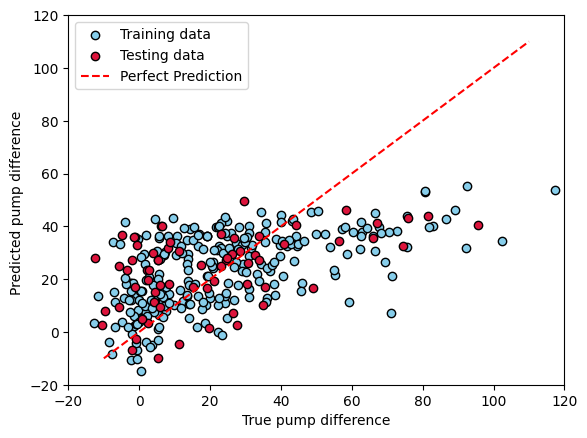

In [ ]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_test_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()

<font color="blue"> Polynomial Regression</font>



1.   <font color="blue"> 2nd degree polynomial</font>



In [ ]:
# Create polynomial features
degree = 2  # degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Create a Polynomial Regression model
poly_reg_model = LinearRegression()

In [ ]:
# Fit the model to the polynomial features
poly_reg_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training set
y_train_pred = poly_reg_model.predict(X_poly_train)

In [ ]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate the R^2 score on the training set
r2_train = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = poly_reg_model.predict(X_poly_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the R^2 score on the test set
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on test set:", mse_test)
print("R^2 score on training set:", r2_train)
print("R^2 score on test set:", r2_test)

Mean Squared Error (MSE) on training set: 303.2881392473321
Mean Squared Error (MSE) on test set: 464.18849224388924
R^2 score on training set: 0.48609251913003915
R^2 score on test set: 0.20296750885237735


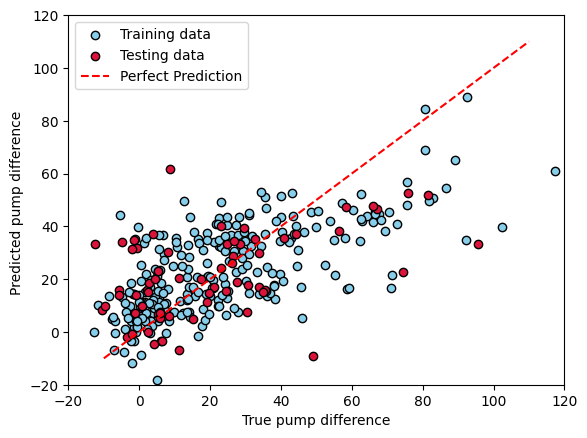

In [ ]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_test_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()



2.   <font color="blue"> 3rd degree polynomial</font>



In [ ]:
# Create polynomial features
degree = 3  # degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Create a Polynomial Regression model
poly_reg_model = LinearRegression()

In [ ]:
# Fit the model to the polynomial features
poly_reg_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the training set
y_train_pred = poly_reg_model.predict(X_poly_train)

In [ ]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate the R^2 score on the training set
r2_train = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = poly_reg_model.predict(X_poly_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the R^2 score on the test set
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on test set:", mse_test)
print("R^2 score on training set:", r2_train)
print("R^2 score on test set:", r2_test)

Mean Squared Error (MSE) on training set: 110.84082471925646
Mean Squared Error (MSE) on test set: 44862537.10060844
R^2 score on training set: 0.8121854380775194
R^2 score on test set: -77029.99129332478


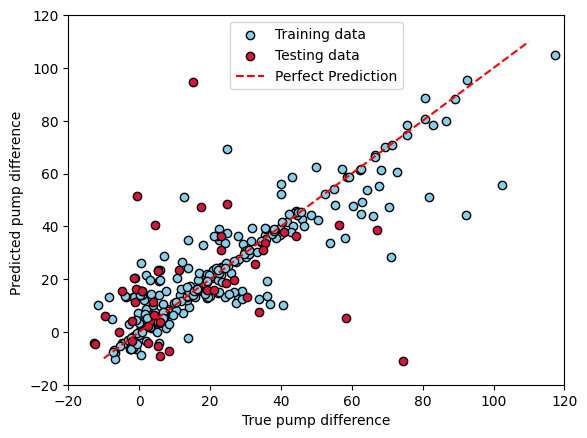

In [ ]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_test_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()

<font color="blue"> Support Vector Regression</font>

In [ ]:
# Create an SVR model
svr_model = SVR(kernel='rbf')

In [ ]:
# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Make predictions on the training set
y_train_pred = svr_model.predict(X_train)

In [ ]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Make predictions on the test set
y_test_pred = svr_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse_train)
print("Mean Squared Error (MSE):", mse_test)
print("R^2 Score:", r2_train)
print("R^2 Score:", r2_test)

Mean Squared Error (MSE): 508.9715177439345
Mean Squared Error (MSE): 511.07211489773454
R^2 Score: 0.13757171260482504
R^2 Score: 0.12246622288300002


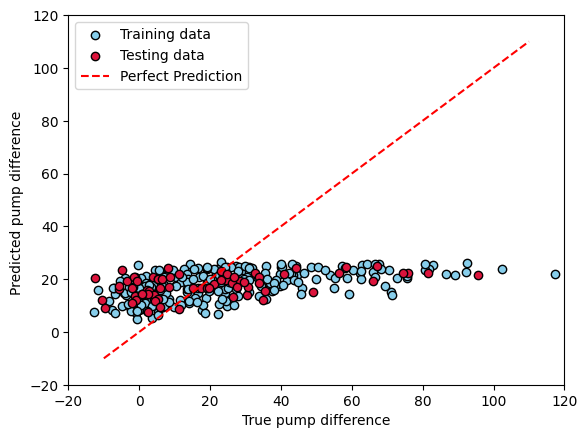

In [ ]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_test_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()

<font color="blue"> Random Forest Regression</font>

In [ ]:
# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=2024)

In [ ]:
# Fit the random forest model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=2024)

In [ ]:
# Evaluate the model's performance
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

# The mean squared error
print("Mean squared error for training: %.2f" % mean_squared_error(y_train, y_train_pred))
# The mean squared error
print("Mean squared error for testing: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for training: %.2f" % r2_score(y_train, y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for testing: %.2f" % r2_score(y_test, y_pred))

Mean squared error for training: 49.18
Mean squared error for testing: 286.19
Coefficient of determination for training: 0.92
Coefficient of determination for testing: 0.51


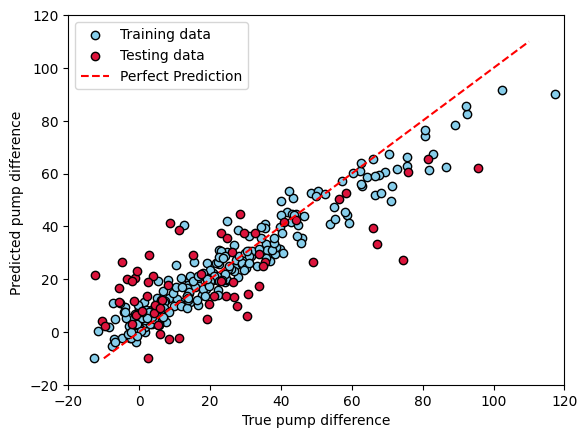

In [ ]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()

<font color="blue"> Voting Regression</font>



1.   <font color="blue"> Linear Regression</font>
2.   <font color="blue"> 2nd degree polynomial Regression</font>
3.   <font color="blue"> Random forest Regression</font>





In [ ]:
# Define the individual regression models
linear_regression = LinearRegression()
polynomial_regression = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
random_forest_regression = RandomForestRegressor()

In [ ]:
# Create a Voting Regressor with the individual models
voting_regressor = VotingRegressor([('linear', linear_regression), ('polynomial', polynomial_regression), ('random_forest', random_forest_regression)])

In [ ]:
# Fit the Voting Regressor to the training data
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear', LinearRegression()),
                            ('polynomial',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('random_forest', RandomForestRegressor())])

In [ ]:
# Make predictions on the test set
y_pred = voting_regressor.predict(X_test)

In [ ]:
# Evaluate the performance of each method in the voting ensemble
for model in (linear_regression, polynomial_regression, random_forest_regression, voting_regressor):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, "R^2 score:", r2_score(y_test, y_pred))

LinearRegression R^2 score: 0.2059111877629758
Pipeline R^2 score: 0.20296750885237735
RandomForestRegressor R^2 score: 0.4859700089987552
VotingRegressor R^2 score: 0.3760010451603826


<font color="blue"> CNN Regression</font>

In [ ]:
#Reshape the data for CNN input
import numpy as np

# Convert DataFrames to NumPy arrays
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

# Reshape X_train
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)

# Reshape X_test
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)



In [ ]:
# Define CNN Model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=X_train_reshaped.shape[1:]))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer with single neuron for regression

In [ ]:
# Compile and Train Model
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/50
7/7 [==============================] - 1s 40ms/step - loss: 1040.5771 - val_loss: 1278.2147
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 980.4464 - val_loss: 1167.4044
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 882.7285 - val_loss: 991.5307
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 740.4748 - val_loss: 788.8331
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 616.1951 - val_loss: 707.7150
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 569.8290 - val_loss: 679.2870
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 547.3157 - val_loss: 615.1461
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 512.3942 - val_loss: 580.0329
Epoch 9/50
7/7 [==============================] - 0s 9ms/step - loss: 495.0948 - val_loss: 555.5956
Epoch 10/50
7/7 [==============================] - 0s 8ms/step - loss: 479.5489 - val_loss: 

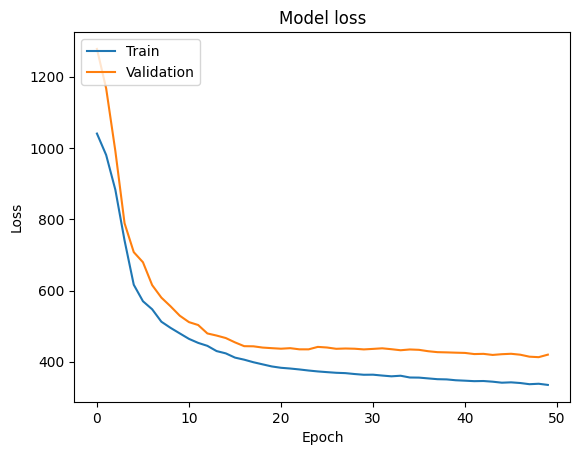

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record the training history
history = model.fit(X_train_reshaped, y_train_array, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate Model
loss = model.evaluate(X_test_reshaped, y_test_array)
print("Test Loss:", loss)

3/3 [==============================] - 0s 7ms/step - loss: 387.0830
Test Loss: 387.0830383300781


In [ ]:
from sklearn.metrics import r2_score

# Predict on training and testing sets
y_train_pred = model.predict(X_train_reshaped)
y_test_pred = model.predict(X_test_reshaped)

# Calculate R-squared for training and testing sets
r2_train = r2_score(y_train_array, y_train_pred)
r2_test = r2_score(y_test_array, y_test_pred)

print("R-squared for training set:", r2_train)
print("R-squared for testing set:", r2_test)


3/3 [==============================] - 0s 4ms/step
R-squared for training set: 0.4059467112019066
R-squared for testing set: 0.3353610298614118


<font color="blue"> Improve the accuracy</font>


*   <font color="blue"> Reducing the hidden layer</font>:



In [ ]:
# Define a simpler CNN model
model2 = Sequential()
model2.add(Conv1D(32, 3, activation='relu', input_shape=X_train_reshaped.shape[1:]))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))  # Output layer with single neuron for regression

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/50
7/7 [==============================] - 2s 54ms/step - loss: 1035.3522 - val_loss: 1295.5007
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 1006.6786 - val_loss: 1252.0929
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 972.8775 - val_loss: 1200.0553
Epoch 4/50
7/7 [==============================] - 0s 15ms/step - loss: 934.1864 - val_loss: 1139.1471
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 890.6517 - val_loss: 1071.2373
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 837.1574 - val_loss: 999.2954
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 783.5916 - val_loss: 923.2810
Epoch 8/50
7/7 [==============================] - 0s 19ms/step - loss: 731.9854 - val_loss: 846.5603
Epoch 9/50
7/7 [==============================] - 0s 32ms/step - loss: 677.0596 - val_loss: 778.6033
Epoch 10/50
7/7 [==============================] - 0s 13ms/step - loss: 631.2720 - v

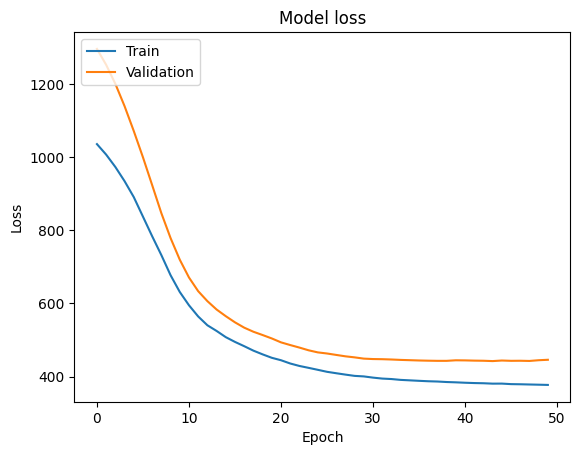

In [ ]:
import matplotlib.pyplot as plt

# Train the model and record the training history
history = model2.fit(X_train_reshaped, y_train_array, epochs=50, batch_size=32, validation_split=0.2)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate Model
loss = model2.evaluate(X_test_reshaped, y_test_array)
print("Test Loss:", loss)

3/3 [==============================] - 0s 8ms/step - loss: 429.2608
Test Loss: 429.2607727050781


In [ ]:
from sklearn.metrics import r2_score

# Predict on training and testing sets
y_train_pred = model2.predict(X_train_reshaped)
y_test_pred = model2.predict(X_test_reshaped)

# Calculate R-squared for training and testing sets
r2_train = r2_score(y_train_array, y_train_pred)
r2_test = r2_score(y_test_array, y_test_pred)

print("R-squared for training set:", r2_train)
print("R-squared for testing set:", r2_test)

3/3 [==============================] - 0s 9ms/step
R-squared for training set: 0.338668256817508
R-squared for testing set: 0.2629399509865511


From the above results, the random forest regression shows the best accuracy. However, the overfitting was observed. Next, we are trying to reduce the overfit problem.

<font color="blue"> Reduce the overfit</font>



*   <font color="blue"> We use the grid search method to optimze the parameters in the random forest regression to reduce the overfitting problem.</font>




In [ ]:
# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=2024)

In [18]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [44]:
# Create a Random Forest Regression model with optimal parameters
rf_regressor = RandomForestRegressor(max_depth = 10, min_samples_leaf=2, random_state=2024)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=2024)

In [45]:
# Evaluate the model's performance
y_pred = rf_regressor.predict(X_test)
y_train_pred = rf_regressor.predict(X_train)

# The mean squared error
print("Mean squared error for training: %.2f" % mean_squared_error(y_train, y_train_pred))
# The mean squared error
print("Mean squared error for testing: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for training: %.2f" % r2_score(y_train, y_train_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for testing: %.2f" % r2_score(y_test, y_pred))

Mean squared error for training: 99.31
Mean squared error for testing: 321.94
Coefficient of determination for training: 0.83
Coefficient of determination for testing: 0.45


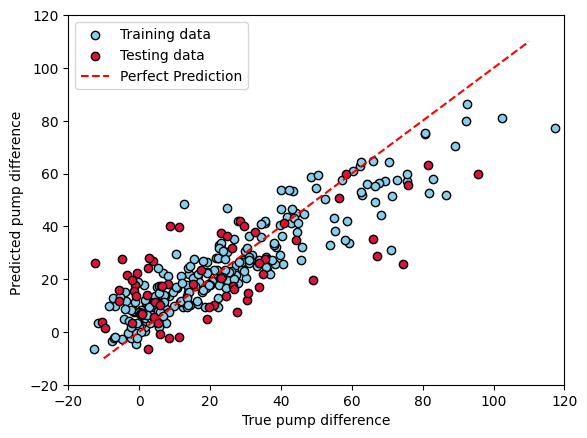

In [46]:
plt.scatter(y_train,y_train_pred,color='skyblue',edgecolor="black",label='Training data')
plt.scatter(y_test,y_pred,color='crimson',edgecolor="black",label='Testing data')
plt.xlabel("True pump difference");plt.ylabel("Predicted pump difference ")
x_= np.linspace(-10,110,100);y_= x_;
plt.plot(x_,y_,color='red', linestyle='--', label= 'Perfect Prediction')
plt.legend(loc='best')
plt.xlim([-20,120])
plt.ylim([-20,120])
#plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1, wspace=0.2, hspace=0.3);
plt.show()